# WALMART RECRUITING STORE SALES FORECASTING

### DESCRIPTION

One challenge of modeling retail data is the need to make decisions based on limited history. If Christmas comes but once a year, so does the chance to see how strategic decisions impacted the bottom line.

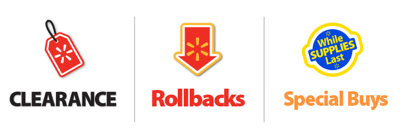

In this recruiting competition, job-seekers are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.

Want to work in a great environment with some of the world's largest data sets? This is a chance to display your modeling mettle to the Walmart hiring teams.

This competition counts towards rankings & achievements.  If you wish to be considered for an interview at Walmart, check the box "Allow host to contact me" when you make your first entry. 

You must compete as an individual in recruiting competitions. You may only use the provided data to make your predictions.

### EVALUATION

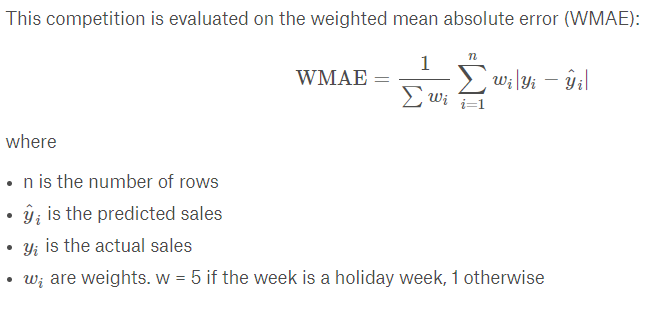

## BUSINESS CONSTRAINTS

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

### Loading train , stores and features

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
train.shape

(421570, 5)

In [4]:
stores = pd.read_csv("stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
stores.shape

(45, 3)

In [6]:
features = pd.read_csv("features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
features.shape

(8190, 12)

In [8]:
test = pd.read_csv('test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [9]:
test.shape

(115064, 4)

## Merging train , Features and stores

In [10]:
train1 = pd.merge(features, train, on=['Store','Date','IsHoliday'], how='right')

In [11]:
train1.shape

(421570, 14)

In [12]:
test1 = pd.merge(features, test, on=['Store','Date','IsHoliday'], how='right')

In [13]:
test1.shape

(115064, 13)

In [14]:
train1.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [15]:
train=pd.merge(train1,stores,how='left',on=['Store'])
train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [16]:
train.shape

(421570, 16)

In [17]:
test=pd.merge(test1,stores,how='left',on=['Store'])
test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,1,A,151315
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2,A,151315
2,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,3,A,151315
3,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,4,A,151315
4,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,5,A,151315


In [18]:
test.shape

(115064, 15)

In [19]:
#train = train.sample(200000)

In [20]:
train

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315
5,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,5749.03,A,151315
6,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,7,21084.08,A,151315
7,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,8,40129.01,A,151315
8,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,9,16930.99,A,151315
9,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10,30721.50,A,151315


In [21]:
test=pd.merge(test1,stores,how='left',on=['Store'])
test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,1,A,151315
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,2,A,151315
2,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,3,A,151315
3,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,4,A,151315
4,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,5,A,151315


In [22]:
test.isnull().sum()

Store               0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday           0
Dept                0
Type                0
Size                0
dtype: int64

In [23]:
train.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

In [24]:
test.shape

(115064, 15)

In [ ]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = test.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### OBSERVATION:
* Higher Unemployment means lower CPI (Consumer Price Index)
* Higher Department have higher sales
* little relationship between holidays, temperatures or fuelprices with our weekly sales.

In [ ]:
%matplotlib inline
plt.scatter(train['Size'].values, train['Weekly_Sales'].values)
plt.show()

In [ ]:
plt.scatter(train['Fuel_Price'].values, train['Weekly_Sales'].values)

In [ ]:
plt.scatter(train['Temperature'].values, train['Weekly_Sales'].values)

In [ ]:
plt.scatter(train['Unemployment'].values, train['Weekly_Sales'].values)

In [ ]:
plt.scatter(train['IsHoliday'].values, train['Weekly_Sales'].values)

In [ ]:
plt.scatter(train['Type'].values, train['Weekly_Sales'].values)

### OBSERVATION:
* holidays clearly show more sales.
* type C stores have fewer sales in general

### Converting 'Date' into datetime format

In [25]:
train['Date'] = pd.to_datetime(train['Date'],format='%Y-%m-%d %H:%M:%S')

In [26]:
test['Date'] = pd.to_datetime(test['Date'],format='%Y-%m-%d %H:%M:%S')

In [27]:
train.sort_values(by='Date',inplace = True , ascending = True)

In [28]:
test.sort_values(by='Date',inplace = True , ascending = True)

In [29]:
train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,6,11437.81,B,103681


In [30]:
test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,1,A,151315
37648,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,74,B,123737
37647,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,72,B,123737
37646,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,71,B,123737
37645,15,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,138.622710,7.992,False,67,B,123737


### Some important features year,month,day,hour,min, day of week added

In [31]:
import datetime as dt

In [32]:
train['year'] = train['Date'].dt.year

In [33]:
test['year'] = test['Date'].dt.year

In [34]:
train['month'] = train['Date'].dt.month

In [35]:
test['month'] = test['Date'].dt.month

In [36]:
train['day'] = train['Date'].dt.day

In [37]:
test['day'] = test['Date'].dt.day

In [38]:
train['dayofweek'] = train['Date'].dt.dayofweek

In [39]:
test['dayofweek'] = test['Date'].dt.dayofweek

In [40]:
def weekend(x):
    if x<5:
        return 0
    else:
        return 1

In [41]:
def holiday(x):
    if x==True:
        return 1
    else:
        return 0

In [42]:
train['IsHoliday'] = train['IsHoliday'].apply(holiday)

In [43]:
test['IsHoliday'] = test['IsHoliday'].apply(holiday)

In [44]:
train['weekend'] = train['dayofweek'].apply(weekend)

In [45]:
test['weekend'] = test['dayofweek'].apply(weekend)

In [46]:
train['IsHoliday'].value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [47]:
test['IsHoliday'].value_counts()

0    106136
1      8928
Name: IsHoliday, dtype: int64

In [48]:
train = train.reset_index()

In [49]:
test = test.reset_index()

In [50]:
train.isnull().sum()

index                0
Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
year                 0
month                0
day                  0
dayofweek            0
weekend              0
dtype: int64

In [51]:
test.isnull().sum()

index               0
Store               0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday           0
Dept                0
Type                0
Size                0
year                0
month               0
day                 0
dayofweek           0
weekend             0
dtype: int64

In [52]:
type(train['day'][0])

numpy.int64

### Checking outlier in WEEKLY_SALES feature

In [ ]:
for i in range(1,11):
    print("{} th percentile".format(90+i),np.percentile(train['Weekly_Sales'],90+i))

In [ ]:
for i in range(1,10):
    print("{} th percentile".format(99+i*0.1),np.percentile(train['Weekly_Sales'],99+i*0.1))
print("{} th percentile".format(100),np.percentile(train['Weekly_Sales'],100))

* Creating dataframe of values > 99.9 percentile

In [ ]:
train[train['Weekly_Sales']>np.percentile(train['Weekly_Sales'],99.9)]

In [ ]:
for i in range(1,10):
    print("{} th percentile".format(99.9+i*0.01),np.percentile(train['Weekly_Sales'],99.9+i*0.01))
print("{} th percentile".format(100),np.percentile(train['Weekly_Sales'],100))

In [ ]:
train[train['Weekly_Sales']>np.percentile(train['Weekly_Sales'],99.99)]

#### OBSERVATION :
* No outliers are present

### Analysis with Markdown Features

In [ ]:
#ax1 = plt.subplot(121)
sns.kdeplot(train['MarkDown1'],shade=True)
plt.xlabel('MarkDown1')
plt.title('PDF')

In [ ]:
sns.kdeplot(train['MarkDown2'],shade=True)
plt.xlabel('MarkDown2')
plt.title('PDF')

In [ ]:
sns.kdeplot(train['MarkDown3'],shade=True)
plt.xlabel('MarkDown3')
plt.title('PDF')

In [ ]:
sns.kdeplot(train['MarkDown4'],shade=True)
plt.xlabel('MarkDown4')
plt.title('PDF')

In [ ]:
sns.kdeplot(train['MarkDown5'],shade=True)
plt.xlabel('MarkDown5')
plt.title('PDF')

#### OBSERVATION:
* MarkDown5 is highly skewed and MarkDown3 is very weired

### Analysis with Temperature feature

In [ ]:
plt.figure(figsize=(30,10))
ax1 = plt.subplot(121)
sns.kdeplot(train['Temperature'],shade=True,ax=ax1)
plt.xlabel('Temperature')
plt.title('PDF')

ax2 = plt.subplot(122)
sns.kdeplot(train['Temperature'],shade=True,ax=ax2,cumulative = True)
plt.xlabel('Temperature')
plt.title('CDF')

### OBSERVATION
* Negative skewness in Fuel_Price distribution

### Analysis with Fuel_Price feature

In [ ]:
plt.figure(figsize=(30,10))
ax1 = plt.subplot(121)
sns.kdeplot(train['Fuel_Price'],shade=True,ax=ax1)
plt.xlabel('Fuel_Price')
plt.title('PDF')

ax2 = plt.subplot(122)
sns.kdeplot(train['Fuel_Price'],shade=True,ax=ax2,cumulative = True)
plt.xlabel('Fuel_Price')
plt.title('CDF')

#### OBSERVATION :
* No information found

### Analysis with Size feature

In [ ]:
import statsmodels

In [ ]:
plt.figure(figsize=(30,10))
ax1 = plt.subplot(121)
sns.kdeplot(train['Size'],shade=True,ax=ax1)
plt.xlabel('Size')
plt.title('PDF')

ax2 = plt.subplot(122)
sns.kdeplot(train['Size'],shade=True,ax=ax2,cumulative = True)
plt.xlabel('Size')
plt.title('CDF')

#### OBSERVATION :
* No information found

## Analysis on STORE feature

In [ ]:
train_Type = train.groupby('Store')['Weekly_Sales'].sum()

In [ ]:
#plt.figure(figsize=(30,10))
y = train_Type.values
index = train_Type.index
df = pd.DataFrame({'Weekly_Sales':y/y.sum()}, index=index)
ax = df.plot.bar(rot=0,figsize=(30,10))
plt.ylabel('% of Weekly_Sales')

### Analysis with isHoliday feature

In [ ]:
#is Holiday
y1 = train['IsHoliday'].value_counts().values

In [ ]:
train_Type = train.groupby('IsHoliday')['Weekly_Sales'].sum()

In [ ]:
train['Weekly_Sales'].sum()

In [ ]:
plt.figure(figsize=(10,10))
y = train_Type.values
index = train_Type.index
df = pd.DataFrame({'Weekly_Sales':y/train['Weekly_Sales'].sum(),'count':y1/y1.sum()}, index=index)
ax = df.plot.bar(rot=0)
plt.ylabel('% of Weekly_Sales and Count')

#### OBSERVATION:
* There is no huge impact of IsHoliday feature as both % of count and % of Sales are same

### Analysis on Dept feature

In [ ]:
train_Type = train.groupby('Dept')['Weekly_Sales'].sum()

In [ ]:
train_Type1 = train.groupby('Dept')['Weekly_Sales'].count()

In [ ]:
y = train_Type.values
y1 = train_Type1.values
index = train_Type.index
df = pd.DataFrame({'Weekly_Sales':y/y.sum(),'count':y1/y1.sum()}, index=index)
ax = df.plot.bar(rot=0,figsize=(30,10))

#### OBSERVATION:
* Store which have 92 departments have highest sales

## Converting Categorical features into Ordinal features

In [53]:
def ordinal_features(x) :
    if x == 'A':
        return 3
    elif x == 'B':
        return 2
    else :
        return 1    

In [54]:
train['Type'] = train['Type'].apply(lambda x: ordinal_features(x))

In [55]:
test['Type'] = test['Type'].apply(lambda x: ordinal_features(x))

### Plot on monthy basis of Weekly_Sales

In [ ]:
plt.figure(figsize=(30,10))
ax = train.resample('m',on='Date')['Weekly_Sales'].sum().plot()
ax.set_title('No of ratings per month')
plt.xlabel('Month')
plt.ylabel('No of ratings')

plt.show()

#### OBSERVATION :
* In DEC month we can see high weekly_Sales in every year
* It appears to be quite obvious. The end of November sees a lot of exceptionally large sales. This special day, better known as Black friday, causes sales to be on fire, and undoubtedly a dummy variable should be created for this day. Also, Christmas, appears here and there. Since it is not considered holiday, we will also make a dummy for this day. Let's see if we should consider some other special days as well.

In [ ]:
train.loc[train['Weekly_Sales'] >240000,"Date"].value_counts()

#### OBSERVATION :
*  it appears that the two days before Christmas and Black Friday sales are high

# engineer features


* We will do a bit of very basic feature engineering here by creating a feature which indicates whether a certain markdown was active at all.

* We can probably safely fill all missing values with zero. For the markdowns this means that there was no markdown. For the weekly sales, the missing values are the ones we have to predict, so it does not really matter what we fill in there.

In [56]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

#### Dummy variables: Categorical Data
* Now we have to create some dummy variebles for categorical data.

In [57]:
# Make sure we can later recognize what a dummy once belonged to
train['Type'] = 'Type_' + train['Type'].map(str)
train['Store'] = 'Store_' + train['Store'].map(str)
train['Dept'] = 'Dept_' + train['Dept'].map(str)
train['IsHoliday'] = 'IsHoliday_' + train['IsHoliday'].map(str)

In [58]:
# Make sure we can later recognize what a dummy once belonged to
test['Type'] = 'Type_' + test['Type'].map(str)
test['Store'] = 'Store_' + test['Store'].map(str)
test['Dept'] = 'Dept_' + test['Dept'].map(str)
test['IsHoliday'] = 'IsHoliday_' + test['IsHoliday'].map(str)

In [59]:
dummies = ['Type','Store','Dept','IsHoliday']

In [ ]:
# Create dummies_train
type_dummies_train = pd.get_dummies(train['Type'])
store_dummies_train = pd.get_dummies(train['Store'])
dept_dummies_train = pd.get_dummies(train['Dept'])
holiday_dummies_train = pd.get_dummies(train['IsHoliday'])

In [ ]:
train['month'] = 'month_' + train['month'].map(str)

In [ ]:
test['month'] = 'month_' + test['month'].map(str)

In [ ]:
month_dummies_train = pd.get_dummies(train['month'])
year_dummies_train = pd.get_dummies(train['year'])
day_dummies_train = pd.get_dummies(train['day'])
dayofweek_dummies_train = pd.get_dummies(train['dayofweek'])
weekend_dummies_train = pd.get_dummies(train['weekend'])

In [ ]:
# Create dummies_test
type_dummies_test = pd.get_dummies(test['Type'])
store_dummies_test = pd.get_dummies(test['Store'])
dept_dummies_test = pd.get_dummies(test['Dept'])
holiday_dummies_test = pd.get_dummies(test['IsHoliday'])

In [ ]:
month_dummies_test = pd.get_dummies(test['month'])
year_dummies_test = pd.get_dummies(test['year'])
day_dummies_test = pd.get_dummies(test['day'])
dayofweek_dummies_test = pd.get_dummies(test['dayofweek'])
weekend_dummies_test = pd.get_dummies(test['weekend'])

In [60]:
from sklearn.preprocessing import OneHotEncoder
Vectorizer = OneHotEncoder()
Vectorizer.fit(train[dummies])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [61]:
train_dummies = Vectorizer.transform(train[dummies])
test_dummies = Vectorizer.transform(test[dummies])

In [62]:
train_dummies

<421570x131 sparse matrix of type '<class 'numpy.float64'>'
	with 1686280 stored elements in Compressed Sparse Row format>

In [63]:
train_dummies_df = pd.DataFrame(train_dummies.toarray(),columns = Vectorizer.get_feature_names())

In [64]:
test_dummies_df = pd.DataFrame(test_dummies.toarray(),columns = Vectorizer.get_feature_names())

In [65]:
def re(feature):    
    train[feature] = train[feature].apply(lambda x: int(x[-1]))
    test[feature] = test[feature].apply(lambda x: int(x[-1]))

In [66]:
for i in dummies:
    re(i)

In [67]:
train.shape

(421570, 22)

In [68]:
test.shape

(115064, 21)

#### Dummy variables: Dates
*  our earlier analysis, it has turned out that the date may be our best friend. As a general rule, it is a good start to already distinguish between different months in our model. This will create 12 dummy variables; one for each month.

Next, let's look at 'special dates'. One variable for Christmas, one for black friday. We have to manually look up the dates of black friday 

In [69]:
train['Black_Friday'] = np.where((train['Date']==dt.datetime(2010, 11, 26).date()) | (train['Date']==dt.datetime(2011, 11, 25).date()), 'yes', 'no')
train['Pre_christmas'] = np.where((train['Date']==dt.datetime(2010, 12, 23).date()) | (train['Date']==dt.datetime(2010, 12, 24).date()) | (train['Date']==dt.datetime(2011, 12, 23).date()) | (train['Date']==dt.datetime(2011, 12, 24).date()), 'yes', 'no')
Black_Friday_dummies_train = pd.get_dummies(train['Black_Friday'] )
Pre_christmas_dummies_train = pd.get_dummies(train['Pre_christmas'])

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [70]:
test['Black_Friday'] = np.where((test['Date']==dt.datetime(2010, 11, 26).date()) | (test['Date']==dt.datetime(2011, 11, 25).date()), 'yes', 'no')
test['Pre_christmas'] = np.where((test['Date']==dt.datetime(2010, 12, 23).date()) | (test['Date']==dt.datetime(2010, 12, 24).date()) | (test['Date']==dt.datetime(2011, 12, 23).date()) | (test['Date']==dt.datetime(2011, 12, 24).date()), 'yes', 'no')
Black_Friday_dummies_test = pd.get_dummies(test['Black_Friday'] )
Pre_christmas_dummies_test = pd.get_dummies(test['Pre_christmas'] )

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [71]:
test.isnull().sum()

index            0
Store            0
Date             0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
IsHoliday        0
Dept             0
Type             0
Size             0
year             0
month            0
day              0
dayofweek        0
weekend          0
Black_Friday     0
Pre_christmas    0
dtype: int64

In [72]:
train = pd.concat([train,train_dummies_df],axis=1)

In [73]:
test = pd.concat([test,test_dummies_df],axis=1)

In [74]:
train.shape,test.shape

((421570, 155), (115064, 154))

####  Store median
* We will take the store median in the available data as one of its properties

In [75]:
# Get dataframe with averages per store and department
medians_train = pd.DataFrame({'Median Sales' :train.groupby(by=['Type','Dept','Store','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians_train.head()

,Type,Dept,Store,IsHoliday,Median Sales
0,1,0,0,0,6248.560
1,1,0,0,1,5396.050
2,1,0,2,0,14494.675
3,1,0,2,1,15119.905
4,1,0,3,0,15737.700


In [76]:
# Merge by type, store, department and month
train = train.merge(medians_train, how = 'left', on = ['Type','Dept','Store','IsHoliday'])

In [77]:
train.shape

(421570, 156)

In [78]:
# Merge by type, store, department and month
test = test.merge(medians_train, how = 'left', on = ['Type','Dept','Store','IsHoliday'])

In [79]:
test.shape

(115064, 155)

In [80]:
# Fill NA
train['Median Sales'].fillna(train['Median Sales'].median(), inplace=True) 

# Create a key for easy access

train['Key'] = train['Type'].map(str)+train['Dept'].map(str)+train['Store'].map(str)+train['Date'].map(str)+train['IsHoliday'].map(str)

In [81]:
# Fill NA
test['Median Sales'].fillna(test['Median Sales'].median(), inplace=True) 

# Create a key for easy access

test['Key'] = test['Type'].map(str)+test['Dept'].map(str)+test['Store'].map(str)+test['Date'].map(str)+test['IsHoliday'].map(str)

#### Lagged Variables
* We will take a lagged variable of our store's previous weeks sales. To do so, we will first add a column with a one week lagged date, sort the data, and then match the lagged sales with the initial dataframe using the department and store number.

In [82]:
from datetime import timedelta

In [83]:
# Attach variable of last weeks time
train['DateLagged'] = train['Date']- timedelta(days=7)
train.head()

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,x2_Dept_95,x2_Dept_96,x2_Dept_97,x2_Dept_98,x2_Dept_99,x3_IsHoliday_0,x3_IsHoliday_1,Median Sales,Key,DateLagged
0,0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9052.895,3112010-02-05 00:00:000,2010-01-29
1,330761,5,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6394.430,2352010-02-05 00:00:000,2010-01-29
2,330762,5,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5644.870,2452010-02-05 00:00:000,2010-01-29
3,330763,5,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5667.765,2552010-02-05 00:00:000,2010-01-29
4,330764,5,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3908.945,2652010-02-05 00:00:000,2010-01-29


In [84]:
# Attach variable of last weeks time
test['DateLagged'] = test['Date']- timedelta(days=7)
test.head()

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,x2_Dept_95,x2_Dept_96,x2_Dept_97,x2_Dept_98,x2_Dept_99,x3_IsHoliday_0,x3_IsHoliday_1,Median Sales,Key,DateLagged
0,0,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9052.895,3112012-11-02 00:00:000,2012-10-26
1,37648,5,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5644.870,2452012-11-02 00:00:000,2012-10-26
2,37647,5,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7161.220,2252012-11-02 00:00:000,2012-10-26
3,37646,5,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4394.590,2152012-11-02 00:00:000,2012-10-26
4,37645,5,2012-11-02,47.36,3.970,4565.57,5904.29,9.00,1437.77,1226.03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5698.220,2752012-11-02 00:00:000,2012-10-26


In [85]:
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_train = train.sort_values(['Store', 'Dept','Date'], ascending=[1, 1,1])
sorted_train = sorted_train.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [86]:
test['Weekly_Sales'] = 0.0

In [87]:
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_test = test.sort_values(['Store', 'Dept','Date'], ascending=[1, 1,1])
sorted_test = sorted_test.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [88]:
sorted_train['LaggedSales'] = np.nan # Initialize column
sorted_train['LaggedAvailable'] = np.nan # Initialize column
last=train.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_train.shape[0]
for index, row in sorted_train.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['Date']== lag_date) & (last['Weekly_Sales']>0)): 
        #sorted_train.loc[index, 'LaggedSales'] = last['Weekly_Sales'] 
        #sorted_train.loc[index, 'LaggedAvailable'] = 1 
        sorted_train.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_train.set_value(index, 'LaggedAvailable',1)
    else:
        #sorted_train.loc[index, 'LaggedSales'] = row['Median Sales']
        #sorted_train.loc[index, 'LaggedAvailable'] = 0
        sorted_train.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_train.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


0% loaded
10% loaded
20% loaded
30% loaded
40% loaded
50% loaded
60% loaded
70% loaded
80% loaded
90% loaded


In [89]:
type(last['Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [90]:
sorted_test['LaggedSales'] = np.nan # Initialize column
sorted_test['LaggedAvailable'] = np.nan # Initialize column
last=test.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_test.shape[0]
for index, row in sorted_test.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['Date']== lag_date) & (last['Weekly_Sales']>0)): 
        #sorted_test.loc[index, 'LaggedSales'] = last['Weekly_Sales'] 
        #sorted_test.loc[index, 'LaggedAvailable'] = 1 
        sorted_test.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_test.set_value(index, 'LaggedAvailable',1)
    else:
        #sorted_test.loc[index, 'LaggedSales'] = row['Median Sales']
        #sorted_test.loc[index, 'LaggedAvailable'] = 0
        sorted_test.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_test.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [91]:
sorted_train[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,Date,LaggedSales,Weekly_Sales,Median Sales
0,0,0,2010-02-05,15691.45,12385.22,15691.45
1,0,0,2010-02-05,15691.45,2495.72,15691.45
2,0,0,2010-02-05,15691.45,140.80,15691.45
3,0,0,2010-02-05,15691.45,18361.14,15691.45
4,0,0,2010-02-05,15691.45,70104.48,15691.45


* Now, merge this new info with our existing dataset.

In [92]:
# Merge by store and department
train = train.merge(sorted_train[['Dept', 'Store','Date','LaggedSales','LaggedAvailable']], how = 'left', on = ['Dept', 'Store','Date'])

MemoryError: 

In [93]:
# Merge by store and department
test = test.merge(sorted_test[['Dept', 'Store','Date','LaggedSales','LaggedAvailable']], how = 'left', on = ['Dept', 'Store','Date'])

MemoryError: 

In [ ]:
train['Sales_dif'] = train['Median Sales'] - train['LaggedSales']
train[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head()

In [ ]:
test['Sales_dif'] = test['Median Sales'] - test['LaggedSales']
test[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head()

* We will take the store average in the available data as one of its properties

* Now, let's change the variable to be forecasted to the difference from the median. Afterward, we can drop the weekly sales.

In [ ]:
train['Difference'] = train['Median Sales'] - train['Weekly_Sales']

In [ ]:
test['Difference'] = test['Median Sales'] - test['Weekly_Sales']

In [ ]:
train.head()

In [ ]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
train

### Plot on daily basis of Weekly_Sales

In [ ]:
plt.figure(figsize=(30,10))
ax = train.resample('d',on='Date')['Weekly_Sales'].sum().plot()
ax.set_title('No of ratings per month')
plt.xlabel('Month')
plt.ylabel('No of ratings')
plt.show()

#### OBSERVATION :
* Same observation in DEC month Weekly Sales are high

In [ ]:
train.head(3)

### Plot on weekly basis of Weekly_Sales

In [ ]:
plt.figure(figsize=(30,10))
ax = train.resample('W-MON',on='Date')['Weekly_Sales'].sum().plot()
ax.set_title('No of ratings per month')
plt.xlabel('Weeks')
plt.ylabel('No of ratings')
plt.show()

#### OBSERVATION :
* On christmas Weekly_Sales are high

In [ ]:
train_Type = train.groupby('Type')['Weekly_Sales'].sum()

In [ ]:
train_Type1 = train.groupby('Type')['Weekly_Sales'].count()

In [ ]:
y = train_Type.values
y1 = train_Type1.values
index = ['A','B','C']
df = pd.DataFrame({'Weekly_Sales':y/y.sum(),'count':y1/y1.sum()}, index=index)
ax = df.plot.bar(rot=0)

#### OBERVATION:
* Type A has Weekly_sales than his count ,and other 2 has more number of counts than weekly_sales. and Type C has almost double counts

In [ ]:
train_Type = train.groupby('day')['Weekly_Sales'].sum()

In [ ]:
train_Type.index

In [ ]:
y = train_Type.values
index = train_Type.index
df = pd.DataFrame({'Weekly_Sales':y/y.sum()}, index=index)
ax = df.plot.bar(rot=0)

In [ ]:
plt.plot(y/y.sum()*100)
plt.ylabel('% of weekly Sales')

### OBSERVATION:
* The above graph follows nice pattern 5 days sales are high and 2 days sales are low in a week
* You can see the zig zag structure

In [ ]:
year = train.groupby('year')['Weekly_Sales'].sum().sort_values(ascending = True)

In [ ]:
year1 = train.groupby('year')['Weekly_Sales'].count().sort_values(ascending = True)

In [ ]:
y = year.values
y1 = year1.values
index = year.index
df = pd.DataFrame({'Weekly_Sales':y/y.sum(),'count':y1/y1.sum()}, index=index)
ax = df.plot.bar(rot=0)

#### OBSERVATION :
* 2010 is slightly more profitable year than others

In [ ]:
train.sort_values(by='Date',inplace = True , ascending = True)

In [ ]:
test.sort_values(by='Date',inplace = True , ascending = True)

In [ ]:
df = train.copy()

In [ ]:
train.isnull().sum()

### Train Test Split

In [ ]:
train=df[0:337256] 
cv=df[337256:]

In [ ]:
train=df[0:337256] 
cv=df[337256:]

#Aggregating the dataset at daily level
#df.Timestamp = pd.to_datetime(df.Date,format='%d-%m-%Y %H:%M') 
#df.index = df.Timestamp 
#df = df.resample('W-MON').mean()
train.Timestamp = pd.to_datetime(train.Date,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
#train = train.resample('W-MON').mean() 
cv.Timestamp = pd.to_datetime(cv.Date,format='%d-%m-%Y %H:%M') 
cv.index = cv.Timestamp 
#cv = cv.resample('W-MON').mean()
test.Timestamp = pd.to_datetime(test.Date,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
#test = test.resample('W-MON').mean()

In [ ]:
train_index = train['index']

In [ ]:
cv_index = cv['index']

In [ ]:
test_index = test['index']

In [ ]:
train = train.drop('index',axis = 1)

In [ ]:
cv = cv.drop('index',axis = 1)

In [ ]:
test = test.drop('index',axis=1)

#### OBSERVATION:
* In markdown nan values are present so we are imputing these nan values with mean

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train['MarkDown1'].as_matrix().reshape(-1,1))
train['MarkDown1'] = imp.transform(train['MarkDown1'].as_matrix().reshape(-1,1))
cv['MarkDown1'] = imp.transform(cv['MarkDown1'].as_matrix().reshape(-1,1))
test['MarkDown1'] = imp.transform(test['MarkDown1'].as_matrix().reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train['MarkDown2'].as_matrix().reshape(-1,1))
train['MarkDown2'] = imp.transform(train['MarkDown2'].as_matrix().reshape(-1,1))
cv['MarkDown2'] = imp.transform(cv['MarkDown2'].as_matrix().reshape(-1,1))
test['MarkDown2'] = imp.transform(test['MarkDown2'].as_matrix().reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train['MarkDown3'].as_matrix().reshape(-1,1))
train['MarkDown3'] = imp.transform(train['MarkDown3'].as_matrix().reshape(-1,1))
cv['MarkDown3'] = imp.transform(cv['MarkDown3'].as_matrix().reshape(-1,1))
test['MarkDown3'] = imp.transform(test['MarkDown3'].as_matrix().reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train['MarkDown4'].as_matrix().reshape(-1,1))
train['MarkDown4'] = imp.transform(train['MarkDown4'].as_matrix().reshape(-1,1))
cv['MarkDown4'] = imp.transform(cv['MarkDown4'].as_matrix().reshape(-1,1))
test['MarkDown4'] = imp.transform(test['MarkDown4'].as_matrix().reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train['MarkDown5'].as_matrix().reshape(-1,1))
train['MarkDown5'] = imp.transform(train['MarkDown5'].as_matrix().reshape(-1,1))
cv['MarkDown5'] = imp.transform(cv['MarkDown5'].as_matrix().reshape(-1,1))
test['MarkDown5'] = imp.transform(test['MarkDown5'].as_matrix().reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train['CPI'].as_matrix().reshape(-1,1))
train['CPI'] = imp.transform(train['CPI'].as_matrix().reshape(-1,1))
cv['CPI'] = imp.transform(cv['CPI'].as_matrix().reshape(-1,1))
test['CPI'] = imp.transform(test['CPI'].as_matrix().reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train['Unemployment'].as_matrix().reshape(-1,1))
train['Unemployment'] = imp.transform(train['Unemployment'].as_matrix().reshape(-1,1))
cv['Unemployment'] = imp.transform(cv['Unemployment'].as_matrix().reshape(-1,1))
test['Unemployment'] = imp.transform(test['Unemployment'].as_matrix().reshape(-1,1))

In [ ]:
test = test.fillna(0.0)

In [ ]:
test.isnull().sum()

In [ ]:
x_train = train.drop('Weekly_Sales',axis=1)
y_train = train['Weekly_Sales']

In [ ]:
x_cv = cv.drop('Weekly_Sales',axis=1)
y_cv = cv['Weekly_Sales']

#### OBSERVATION :
* Lagged_Sales is the most important feature

## Naive Approcah

In [ ]:
dd= np.asarray(y_train)
y_hat = x_cv.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(x_train.index, y_train, label='x_train')
plt.plot(x_cv.index,y_cv, label='x_cv')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(y_hat.naive.values - y_cv.values))/len(mask_array)

### Simple Average

In [ ]:
y_hat_avg = x_cv.copy()
y_hat['avg_forecast'] = y_train.mean()
plt.figure(figsize=(12,8))
plt.plot(x_train.index, y_train, label='x_train')
plt.plot(x_cv.index,y_cv, label='x_cv')
plt.plot(y_hat.index,y_hat['avg_forecast'], label='avg Forecast')
plt.legend(loc='best')
plt.title("avg Forecast")
plt.show()

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(y_hat.avg_forecast.values - y_cv.values))/len(mask_array)

### Moving Average

In [ ]:
y_hat_avg = x_cv.copy()
y_hat_avg['moving_avg_forecast'] = y_train.rolling(100).mean().iloc[-1]
#x_train['moving_avg_forecast'] = y_train.rolling(100).mean().iloc[-1]
#x_cv['moving_avg_forecast'] = y_train.rolling(100).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(y_cv, label='cv')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(y_hat_avg['moving_avg_forecast'].values - y_cv.values))/len(mask_array)

## Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = x_cv.copy()
fit2 = SimpleExpSmoothing(np.asarray(y_train)).fit(smoothing_level=0.3,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(x_cv))
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(y_cv, label='cv')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(y_hat_avg['SES'].values - y_cv.values))/len(mask_array)

## Applying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
columns = train.columns.tolist()

In [ ]:
columns = [c for c in columns if c not in ["Date",'Weekly_Sales','DateLagged','index','Key']]

In [ ]:
x_train['Black_Friday'] = x_train['Black_Friday'].apply(lambda x : 1 if x == 'yes' else 0)

In [ ]:
x_train['Pre_christmas'] = x_train['Pre_christmas'].apply(lambda x : 1 if x == 'yes' else 0)

In [ ]:
x_cv['Black_Friday'] = x_cv['Black_Friday'].apply(lambda x : 1 if x == 'yes' else 0)

In [ ]:
x_cv['Pre_christmas'] = x_cv['Pre_christmas'].apply(lambda x : 1 if x == 'yes' else 0)

In [ ]:
test['Black_Friday'] = test['Black_Friday'].apply(lambda x : 1 if x == 'yes' else 0)

In [ ]:
test['Pre_christmas'] = test['Pre_christmas'].apply(lambda x : 1 if x == 'yes' else 0)

In [ ]:
x_train[columns].columns

In [ ]:
reg = LinearRegression(normalize = True)
reg.fit(x_train[columns], y_train)

In [ ]:
y_hat = reg.predict(x_cv[columns])

In [ ]:
y_hat1 = reg.predict(x_train[columns])

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(y_hat - y_cv.values))/len(mask_array)

In [ ]:
y_hat

In [ ]:
x_train

## Applying XGBoost  1

In [ ]:
import xgboost as xgb 
from sklearn.model_selection import RandomizedSearchCV
params={"max_depth" : [ 10, 12, 15,20,22,24,26,27,29,30], 
        "min_child_weight": [0.4,0.5, 1.0, 3.0, 5.0,6.0, 7.0,8.0, 10.0],} 

estimator1 = xgb.XGBRegressor(objective= 'reg:squarederror', eval_metric= 'mae',scale_pos_weight = 1) 
Rsearch1= RandomizedSearchCV(estimator1,param_distributions=params,scoring='neg_mean_absolute_error',n_jobs=-1,iid=False,cv=5,verbose=21)
Rsearch1.fit(x_train[columns],y_train) 
Rsearch1.best_params_, Rsearch1.best_score_

In [ ]:
md = Rsearch1.best_params_['max_depth']
mc = Rsearch1.best_params_['min_child_weight']

In [ ]:
estimator1 = xgb.XGBRegressor(objective= 'reg:squarederror', eval_metric= 'mae',scale_pos_weight = 1,min_child_weight=mc,max_depth=md) 

In [ ]:
estimator1.fit(x_train[columns],y_train)

In [ ]:
xgb_cv = estimator1.predict(x_cv[columns])

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(xgb_cv - y_cv.values))/len(mask_array)

## XG Boost 2

In [ ]:
import xgboost as xgb 
from sklearn.model_selection import RandomizedSearchCV
params={"colsample_bytree": [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
        'subsample':[0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1.0],} 

estimator2 = xgb.XGBRegressor(objective= 'reg:squarederror', eval_metric= 'mae',scale_pos_weight = 1,min_child_weight=mc,max_depth=md) 
Rsearch2= RandomizedSearchCV(estimator2,param_distributions=params,scoring='neg_mean_absolute_error',n_jobs=-1,iid=False,cv=5,verbose=21)
Rsearch2.fit(x_train[columns],y_train) 
Rsearch2.best_params_, Rsearch2.best_score_

In [ ]:
co = Rsearch2.best_params_['colsample_bytree']
su = Rsearch2.best_params_['subsample']

In [ ]:
estimator2 = xgb.XGBRegressor(objective= 'reg:squarederror', eval_metric= 'mae',scale_pos_weight = 1,min_child_weight=mc,max_depth=md,colsample_bytree=co,subsample=su) 

In [ ]:
estimator2.fit(x_train[columns],y_train)

In [ ]:
xgb_cv = estimator2.predict(x_cv[columns])

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(xgb_cv - y_cv.values))/len(mask_array)

## Appying Random Forest 

In [ ]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={"n_estimators": [100,200,300,500,600,700],
       "max_depth": [2,3,5,7,8,9,10,12,14,15,18,20]} 

estimator3 = RandomForestRegressor(random_state = 11) 
Rsearch3= RandomizedSearchCV(estimator3,param_distributions=params,scoring='neg_mean_absolute_error',n_jobs=-1,iid=False,cv=5,verbose = 21)
Rsearch3.fit(x_train[columns],y_train) 
Rsearch3.best_params_, Rsearch3.best_score_

In [ ]:
n = Rsearch3.best_params_['n_estimators']
md = Rsearch3.best_params_['max_depth']

In [ ]:
rfr = RandomForestRegressor(n_estimators =n,max_depth = md  ,random_state=0)#RandomForestRegressor
rfr.fit(x_train[columns],y_train)
y_pred=rfr.predict(x_cv[columns])

In [ ]:
mask = []
for i in x_cv['IsHoliday'].values:
    if i:
        mask.append(5.0)
    else:
        mask.append(1.0)

mask_array = np.array(mask)
np.sum(mask_array*abs(y_pred - y_cv.values))/len(mask_array)

## Kaggle Submissions

In [ ]:
x_train.shape

In [ ]:
test.isnull().sum()

In [ ]:
test1 = estimator1.predict(test[columns])

In [ ]:
test['Store'] = test['Store'].apply(lambda x:x.split('_')[1])

In [ ]:
test['Dept'] = test['Dept'].apply(lambda x:x.split('_')[1])

In [ ]:
test['Id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test['Date'].astype(str)

In [ ]:
test1_csv = pd.DataFrame({"Id":test['Id'].values,'Weekly_Sales':test1})

In [ ]:
test1_csv.to_csv('test1_csv.csv',index=False)

In [ ]:
test2 = estimator2.predict(test[columns])

In [ ]:
test2_csv = pd.DataFrame({"Id":test['Id'].values,'Weekly_Sales':test2})

In [ ]:
test2_csv.to_csv('test2_csv.csv',index=False)

In [ ]:
test3=rfr.predict(test[columns])

In [ ]:
test3_csv = pd.DataFrame({"Id":test['Id'].values,'Weekly_Sales':test3})

In [ ]:
test3_csv.to_csv('test3_csv.csv',index=False)

In [ ]:
test1_csv.shape

## CONCLUSION

In [ ]:
from prettytable import PrettyTable

pretty = PrettyTable()

pretty.field_names = ['Vectorizer','WMAE on cv','WMAE on test(kaggle)']

pretty.add_row(['Naive Approch','16421.310',''])
pretty.add_row(['Simple Average','17301.2044',''])
pretty.add_row(['Moving Average','17859.508',''])
pretty.add_row(['Simple Exponential Smoothing','15264.61062',''])
pretty.add_row(['Linear Regression','16800.376',''])
pretty.add_row(['XG Boost 1 ','2083.785','4337.56'])
pretty.add_row(['XG Boost 2 ','2148.803','4524.86'])
pretty.add_row(['Random Forest','2782.752','4602.81'])

print(pretty)

In [94]:
import numpy as np

In [96]:
a1 = np.array(range(1,6))

In [110]:
a1 = a1.reshape(-1,1)

In [102]:
a2 = np.array(range(1,6))

In [111]:
a2 = a1.reshape(-1,1)

In [109]:
a1

array([1, 2, 3, 4, 5])

In [112]:
np.concatenate((a1,a2),axis=1)

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [129]:
res = [i,j for i,j in zip(a1, a2)] 

SyntaxError: invalid syntax (<ipython-input-129-99e9f3930dbb>, line 1)

In [123]:
a1 = list(a1)

In [124]:
a2 = list(a2)

In [130]:
res = list(map(lambda(i, j): i+j, zip(a1, a2)))

SyntaxError: invalid syntax (<ipython-input-130-50313a83054d>, line 1)